In [21]:
# Step 1: Load the dataset
import pandas as pd

# Assuming the data is in a CSV format and each line of text is a comma-separated set of values.
# You would need to update the path to the location where the data is stored.
file_path = './data/sample_reviews.csv'

# Loading the dataset into a pandas DataFrame
tiktok_reviews = pd.read_csv(file_path)

# Step 2: Data Cleaning
# If 'review_id' is a unique identifier, we can check for duplicates based on this field
tiktok_reviews.drop_duplicates(subset='review_id', inplace=True)

# Step 3: Exploratory Data Analysis (EDA)
# Descriptive statistics for upvotes
upvotes_stats = tiktok_reviews['upvotes'].describe()

# Convert 'posted_date' to datetime and create a 'year' column for further analysis
tiktok_reviews['posted_date'] = pd.to_datetime(tiktok_reviews['posted_date'], format='%Y-%m-%d %H:%M', errors='coerce')
tiktok_reviews['year'] = tiktok_reviews['posted_date'].dt.year

# Save the cleaned and processed dataframe to a new CSV file
output_file_path = './data/cleaned_reviews.csv'
tiktok_reviews.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved to {output_file_path}")


Cleaned dataset saved to ./data/cleaned_reviews.csv


In [20]:
cleaned_reviews = pd.read_csv(output_file_path)
cleaned_reviews.head()

,review_id,review_text,upvotes,app_version,posted_date,year
0,gp:AOqpTOGSsGv5rOA79ttW2LE0FeMYvkdUuXRMTfbyMk0...,It is an excellent solution to finding videos ...,402,21.2.5,2021-09-20 07:50:00,2021
1,gp:AOqpTOEDQ9__FJihY_0V4iwqy4P2OK8tGVR1tFBixYb...,Great app works really well so many features s...,67,21.2.5,2021-09-19 23:10:00,2021
2,gp:AOqpTOEGEfr8TL0iKTlpbTDeM8P7HywlMmP9CkHMoaT...,I down loaded app but didnt work . i love this...,24,21.2.5,2021-09-19 08:59:00,2021
3,gp:AOqpTOGZBDl9dpghmb43Mx1tnlWCOjNXyuVn5Mxf49c...,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,2021-09-19 16:34:00,2021
4,gp:AOqpTOFioH3wud_JnC4aPCG4p7s5DEEN2yZAWNXdRJj...,Currently it's working good for me except a fe...,232,21.1.41,2021-09-14 06:35:00,2021


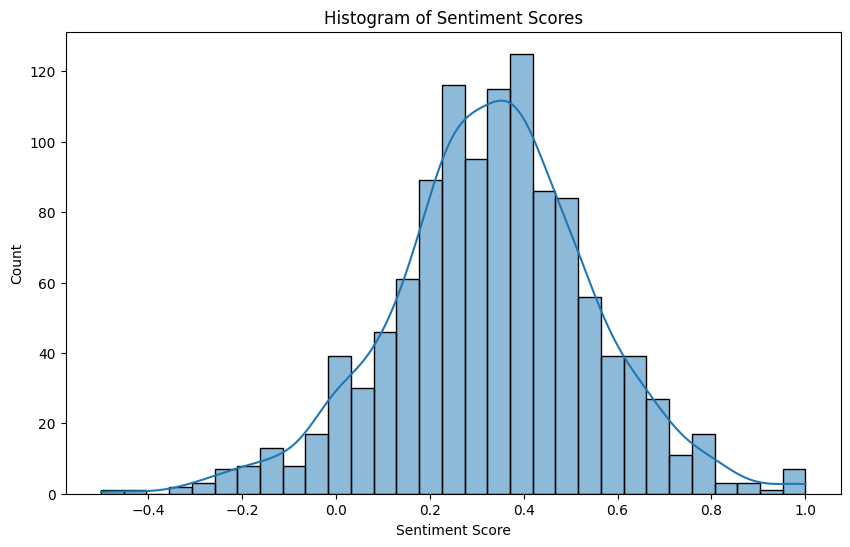

Dataset with sentiment scores saved to ./data/reviews_with_sentiment.csv


In [3]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text: str) -> float:
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'review_text' column
tiktok_reviews['sentiment'] = tiktok_reviews['review_text'].apply(calculate_sentiment)

# Visualize the sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(tiktok_reviews['sentiment'], kde=True)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# Save the dataframe with sentiment scores to a new CSV file
sentiment_output_file_path = './data/reviews_with_sentiment.csv'
tiktok_reviews.to_csv(sentiment_output_file_path, index=False)
print(f"Dataset with sentiment scores saved to {sentiment_output_file_path}")


In [4]:
from textblob import TextBlob

# Function to classify sentiment
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply function to reviews
tiktok_reviews['sentiment_score'] = tiktok_reviews['review_text'].apply(detect_sentiment)
tiktok_reviews['sentiment'] = pd.cut(tiktok_reviews['sentiment_score'], bins=3, labels=["negative", "neutral", "positive"])


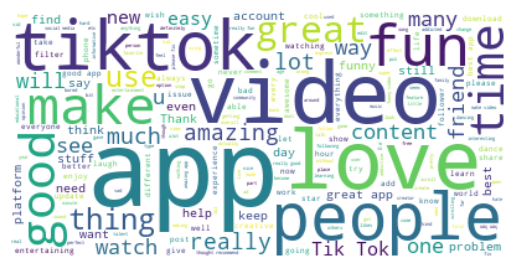

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the reviews into a single text
text = ' '.join(review for review in tiktok_reviews['review_text'])

# Generate and display word cloud
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the text data
count_vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vect.fit_transform(tiktok_reviews['review_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5)
lda.fit(dtm)


LatentDirichletAllocation(n_components=5)

/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_11071/2077601828.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_per_month = tiktok_reviews.set_index('posted_date').resample('M').size()


<Axes: title={'center': 'Number of Reviews per Month'}, xlabel='posted_date'>

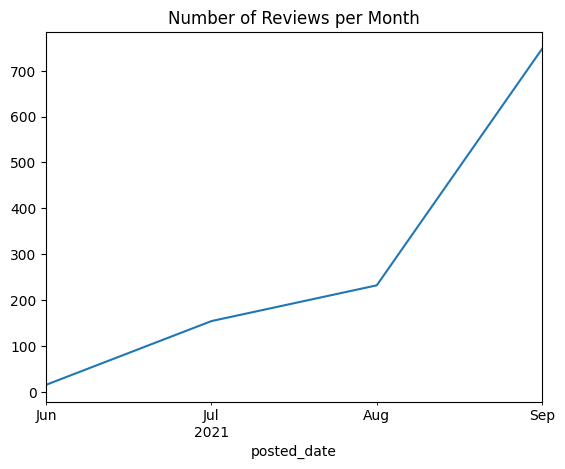

In [7]:
# Assuming 'posted_date' is already in datetime format
reviews_per_month = tiktok_reviews.set_index('posted_date').resample('M').size()
reviews_per_month.plot(title='Number of Reviews per Month')


In [8]:
# Calculate the correlation
correlation = tiktok_reviews['upvotes'].corr(tiktok_reviews['sentiment_score'])
print(f'Correlation between upvotes and sentiment score: {correlation}')


Correlation between upvotes and sentiment score: -0.03732547822002139


In [9]:
# Example using a linear regression model for prediction
from sklearn.linear_model import LinearRegression

# You need to prepare your features (X) and target (y) from your dataset
# Here's a simplified example:
X = tiktok_reviews[['sentiment_score']]  # feature
y = tiktok_reviews['upvotes']            # target

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [10]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Process a review text
doc = nlp(tiktok_reviews['review_text'][0])

# Extract entities
for ent in doc.ents:
    print(ent.text, ent.label_)


In [11]:
# Define a simple engagement score function
def engagement_score(upvotes, sentiment_score):
    return upvotes * (1 + sentiment_score)

# Apply the function to the dataframe
tiktok_reviews['engagement'] = tiktok_reviews.apply(lambda row: engagement_score(row['upvotes'], row['sentiment_score']), axis=1)


In [12]:
import ssl
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhaveshthadhani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhaveshthadhani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure that NLTK Stopwords are downloaded
nltk.download('stopwords')

# Tokenization and removal of stopwords
stop_words = set(stopwords.words('english'))
tiktok_reviews['tokenized'] = tiktok_reviews['review_text'].apply(word_tokenize)
tiktok_reviews['tokens_filtered'] = tiktok_reviews['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

# Counting word frequency
word_counts = Counter(word for tokens in tiktok_reviews['tokens_filtered'] for word in tokens)
most_common_words = word_counts.most_common(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhaveshthadhani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing and vectorization for LDA
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(tiktok_reviews['review_text'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_topics = lda_model.fit_transform(data_vectorized)

# Getting words for each topic
# Use get_feature_names_out() instead of get_feature_names()
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic 0:
app love like videos people great fun tok good really
Topic 1:
app love people great amazing things like time video different
Topic 2:
app love people like fun good really make tiktok great
Topic 3:
videos app like tiktok fun make good love just great
Topic 4:
app love tiktok just good people videos fun like really


/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_11071/2064016537.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = tiktok_reviews.resample('M').size()


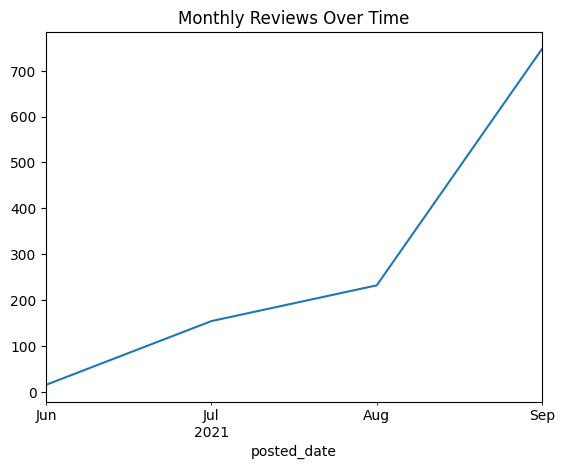

In [16]:
# Assuming you have already converted 'posted_date' to datetime and created a 'year' column
tiktok_reviews.set_index('posted_date', inplace=True)
monthly_reviews = tiktok_reviews.resample('M').size()

# Plotting time series of reviews
monthly_reviews.plot(title='Monthly Reviews Over Time')
plt.show()


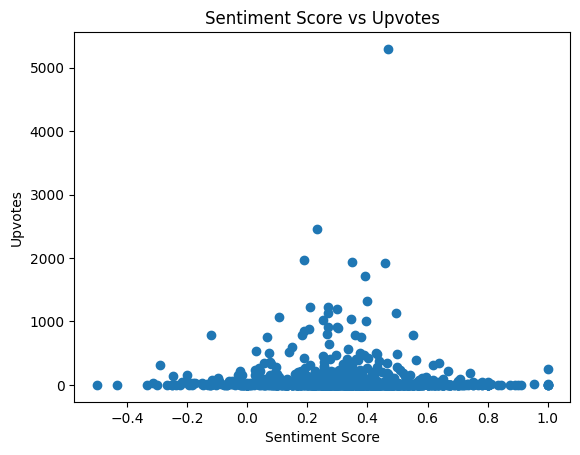

In [17]:
# Assuming sentiment analysis has been done and 'sentiment_score' column is present
tiktok_reviews['sentiment_score'].corr(tiktok_reviews['upvotes'])

# Scatter plot
plt.scatter(tiktok_reviews['sentiment_score'], tiktok_reviews['upvotes'])
plt.xlabel('Sentiment Score')
plt.ylabel('Upvotes')
plt.title('Sentiment Score vs Upvotes')
plt.show()


In [18]:
import nbformat
print(nbformat.__version__)


5.10.3


In [19]:
import plotly.express as px

# Interactive scatter plot using Plotly
fig = px.scatter(tiktok_reviews, x='sentiment_score', y='upvotes', color='app_version')
fig.show()
